# Trabalho 1
** Vou escrever algo fofo aqui

## Parte 1 : Transformação de itensidade
A ideia desta parte é aplicar alguns métodos simples para alterar os valores de intensidade de uma imagem

### Transformação do negativo da imagem
A transformada de uma imagem pode ser dada da seguinte forma : Se pegarmos uma imagem em padrão _cinza_ ou _RGB_. A imagem invertida será

img_invertida[i] = 255 - x_{i}

onde x é a imagem original e 0 <= x_{i} <= 255

Vou descrever pq eu fiz essa função fodona aqui

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def plot_img(img: np.ndarray, show_title: bool = False, title_msg: str = "") -> None:
    """

    :param img:
    :param show_title:
    :param title_msg:
    :return:
    """
    plt.imshow(img, cmap="gray")
    if (show_title):
        plt.title(title_msg)
    plt.axis("off")
    plt.show()

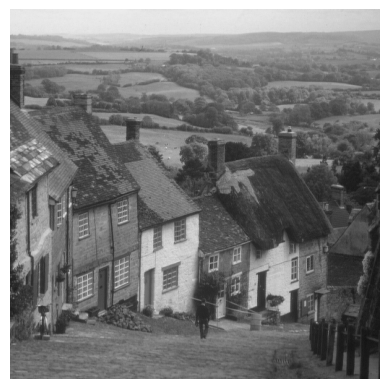

In [2]:
img_city = cv2.imread("Imagens/city.png")
plot_img(img_city)

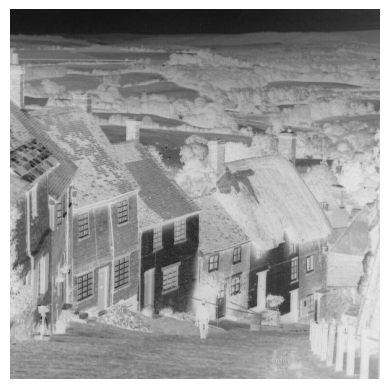

In [3]:
# fazendo o negativo da imagem
img_city_negative = 255 - img_city
plot_img(img_city_negative)

### Imagem transformada em um intervalo
A ideia desta parte do projeto, é aplicar uma técnica de _threshold_ na imagem, usando um intervalo [a, b]. Neste caso, todos os valores da imagem que estiverem abaixo de a, se tornarão a e todos os valores acima de b se tornarão b

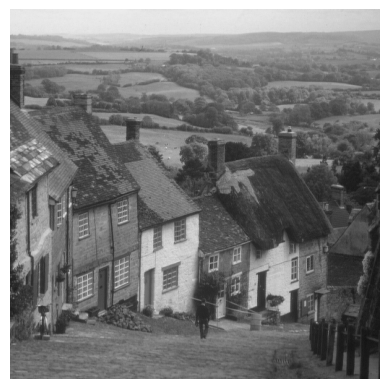

valor de pixel mínimo da imagem : 16
valor de pixel máximo da imagem : 235


In [4]:
plot_img(img_city)

print("valor de pixel mínimo da imagem : {}".format(img_city.min()))
print("valor de pixel máximo da imagem : {}".format(img_city.max()))

valor de pixel mínimo da antes da transformação : 16
valor de pixel máximo da imagem transformada : 235


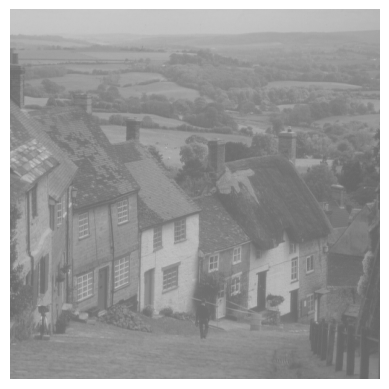

valor de pixel mínimo da imagem transformada : 100
valor de pixel máximo da imagem transformada : 200


In [5]:
img_transform = img_city.copy()

print("valor de pixel mínimo da antes da transformação : {}".format(img_transform.min()))
print("valor de pixel máximo da imagem transformada : {}".format(img_transform.max()))

# Normalizando a imagem o intervalo [0, 1]
img_transform = (img_transform - np.min(img_transform)) / np.ptp(img_transform)
new_range = (200 - 100)

# Normalizando a imagem no intervalo [100, 200] como np.uint8
img_transform = ((new_range * (img_transform - np.min(img_transform)) / np.ptp(img_transform)) + new_range).astype(
    np.uint8)

plot_img(img_transform)

print("valor de pixel mínimo da imagem transformada : {}".format(img_transform.min()))
print("valor de pixel máximo da imagem transformada : {}".format(img_transform.max()))

### Inverter os valores de intensidade das linhas pares de uma matriz
Para esta parte, a abordagem utilizada será de fazer um _slicing_ nos índices pares da imagem e depois pegar os valores dos últimos elementos das
linhas e atribuir esses valores do fim da linha para o começo da linha

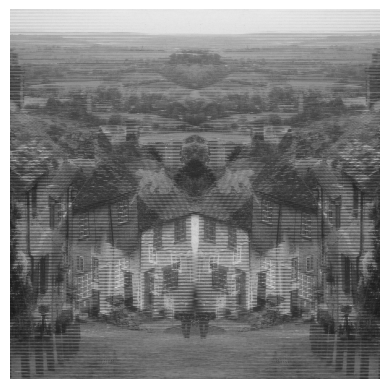

In [6]:
img_city_inverted_lines = img_city.copy()
img_city_inverted_lines[::2, :, :] = img_city_inverted_lines[::2, ::-1, :]

# Essa é uma outra alternativa de fazer a mesma operação
# img_city_inverted_lines[::2, :, :] = np.flip(img_city_inverted_lines[::2, :, :], axis=1)

plot_img(img_city_inverted_lines)

### Operação de reflexão de linhas
A ideia desta operação é pegar todos os valores das colunas até a linha que é a metade do total das linhas da imagem. Por fins práticos, vamos supor que k é
um valor inteiro que representa o índice da metade das colunas.
Após isso, as linhas k + 1 da imagem original terão os seus valores de intensidade trocados com esse outro vetor.

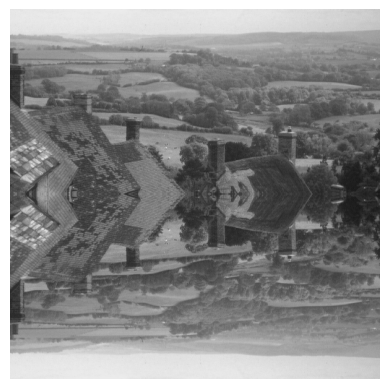

In [7]:
img_city_refleted_lines = img_city.copy()
n = img_city_refleted_lines.shape[0] // 2
half_img_city_refleted = img_city_refleted_lines[:n, :, :]
img_city_refleted_lines[n:, :, :] = half_img_city_refleted[::-1, ..., :]

# Outra alternativa seria usar o seguinte comando
# img_city_refleted_lines[n:, :, :] = np.flip(half_img_city_refleted, axis=0)

plot_img(img_city_refleted_lines)

### Espelhamento vertical
A ideia será aplicar um espelhamento vertical na imagem. Porém, utilizando todas as linhas da imagem para essa inversão

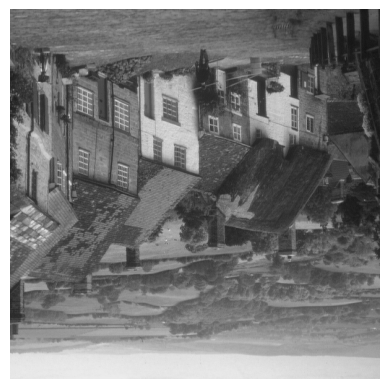

In [8]:
img_city_refleted_col = img_city.copy()
img_city_refleted_col = np.flipud(img_city_refleted_col)

plot_img(img_city_refleted_col)


## Parte 2 : Ajuste de Brilho
** escrever mais coisas fofas aqui
https://www.codegrepper.com/code-examples/python/convert+rgb+to+binary+image+opencv+python
https://stackoverflow.com/questions/56766146/how-to-change-the-colors-of-a-binary-image-using-python

### Transformação da imagem no intervalo [0, 100]

In [9]:
babbo = cv2.imread("Imagens/baboon.png", 0)

valor de pixel mínimo da imagem binaria : 0
valor de pixel máximo da imagem binaria : 230


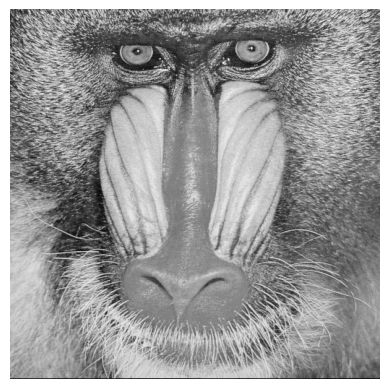

In [10]:
babbo_binary = babbo.copy()

print("valor de pixel mínimo da imagem binaria : {}".format(babbo_binary.min()))
print("valor de pixel máximo da imagem binaria : {}".format(babbo_binary.max()))

plot_img(babbo_binary)

### Aplicação da equação b = A^(1/gamma) com diferentes valores de gamma

Inicialmente, vamos definir a equação para aplicar o gamma de uma imagem

In [11]:
def change_gamma_img(img: np.ndarray, gamma: float) -> np.ndarray:
    """
    Função que muda o contraste da imagem

    :param img: imagem de entrada
    :param gamma: valor float de gamma
    :return: retorna a imagem aplicada com o contraste modificado
    """
    b = (img - np.min(img)) / np.ptp(img)  # Alterando o espaço da imagem para o intervalo [0, 1]
    print("Valor mínimo de b após a conversão no intervalo [0, 1] : {}".format(b.min()))
    print("Valor máximo de b após a conversão no intervalo [0, 1] : {}".format(b.max()))
    b **= (1 / gamma)  # Aplicando a operação b = A^(1/gamma)
    return (255 * (b - np.min(b)) / np.ptp(b)).astype(
        np.uint8)  # Voltando para o intervalo [0, 255]

Aplicando a equação para gamma = 1.5

Valor mínimo de b após a conversão no intervalo [0, 1] : 0.0
Valor máximo de b após a conversão no intervalo [0, 1] : 1.0
valor de pixel mínimo da imagem b : 0
valor de pixel máximo da imagem b : 255


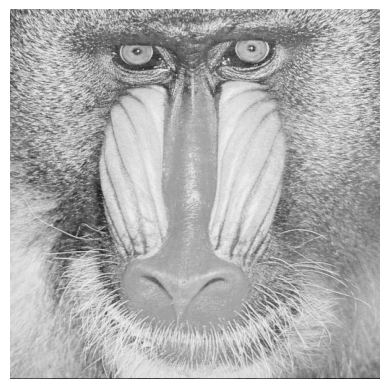

In [12]:
b = change_gamma_img(babbo, 1.5)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plot_img(b)

Aplicando a equação para gamma = 2.5

Valor mínimo de b após a conversão no intervalo [0, 1] : 0.0
Valor máximo de b após a conversão no intervalo [0, 1] : 1.0
valor de pixel mínimo da imagem b : 0
valor de pixel máximo da imagem b : 255


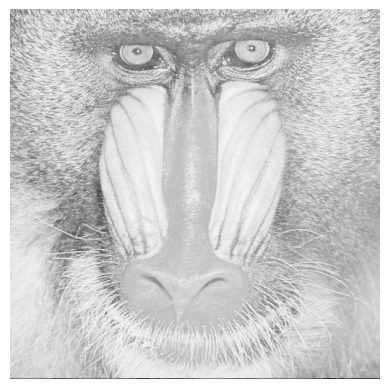

In [13]:
b = change_gamma_img(babbo, 2.5)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plot_img(b)

Aplicando para gamma = 3.5

Valor mínimo de b após a conversão no intervalo [0, 1] : 0.0
Valor máximo de b após a conversão no intervalo [0, 1] : 1.0
valor de pixel mínimo da imagem b : 0
valor de pixel máximo da imagem b : 255


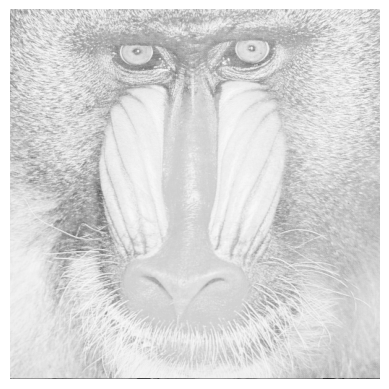

In [14]:
b = change_gamma_img(babbo, 3.5)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plot_img(b)

## Parte 3 : Plano de bits
** escrever mais coisas fofas aqui

In [15]:
def bit_plane_k(img: np.ndarray, k: int) -> np.ndarray:
    """
    Função que realiza o bit plane de uma imagem

    :param img: image de entrada
    :param k: índice do plano de bit
    :return: retorna o slice do plano do bit
    """
    plane = np.full((img.shape[0], img.shape[1]), 2 ** k, np.uint8)
    res = cv2.bitwise_and(plane, img)
    res *= 255
    return res

Aplicando o plano de bit 0

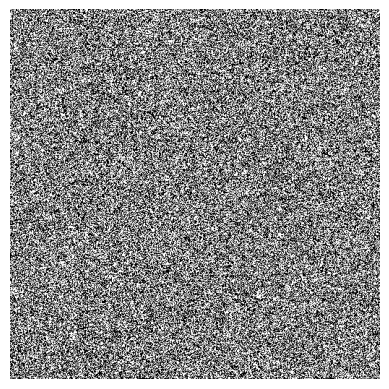

In [16]:
plot_img(bit_plane_k(babbo, 0))

Aplicando o plano de bit 4

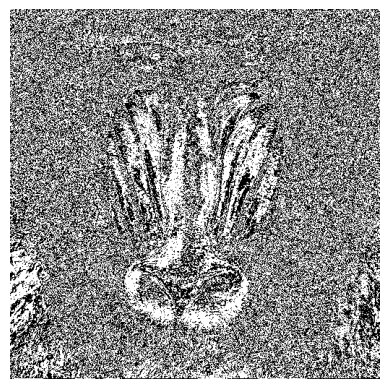

In [17]:
plot_img(bit_plane_k(babbo, 4))

Aplicando o plano de bit 7

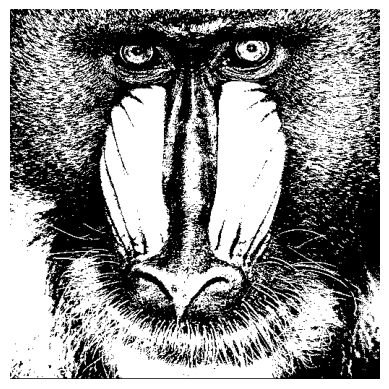

In [18]:
plot_img(bit_plane_k(babbo, 7))

## Parte 4 : Criação de um mosaico em uma imagem

In [19]:
def get_block_from_img(img: np.ndarray, start_index_row: int, end_index_row: int, start_index_col: int,
                       end_index_col: int) -> np.ndarray:
    """

    :param img:
    :param start_index_row:
    :param end_index_row:
    :param start_index_col:
    :param end_index_col:
    :return:
    """
    return img[start_index_row: end_index_row, start_index_col: end_index_col]

In [20]:
def change_block(img: np.ndarray, block_img: np.ndarray, interval_block: tuple[int, int, int, int]) -> None:
    """

    :param img:
    :param block_img:
    :param interval_block:
    :return:
    """
    img[interval_block[0]: interval_block[1],
    interval_block[2]:interval_block[3]] = block_img

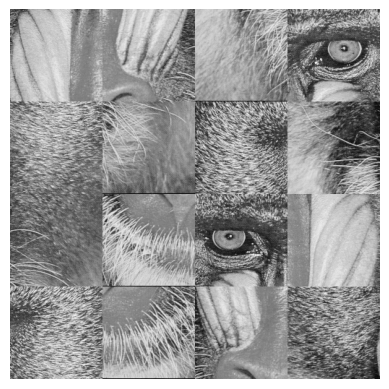

In [21]:
babbo_copy = babbo.copy()

# criando os valores do grid da imagem

# Primeira linha
block_1 = get_block_from_img(babbo, 0, 128, 0, 128)
block_2 = get_block_from_img(babbo, 0, 128, 128, 256)
block_3 = get_block_from_img(babbo, 0, 128, 256, 384)
block_4 = get_block_from_img(babbo, 0, 128, 384, 512)

# Segunda linha
block_5 = get_block_from_img(babbo, 128, 256, 0, 128)
block_6 = get_block_from_img(babbo, 128, 256, 128, 256)
block_7 = get_block_from_img(babbo, 128, 256, 256, 384)
block_8 = get_block_from_img(babbo, 128, 256, 384, 512)

# Terceira linha
block_9 = get_block_from_img(babbo, 256, 384, 0, 128)
block_10 = get_block_from_img(babbo, 256, 384, 128, 256)
block_11 = get_block_from_img(babbo, 256, 384, 256, 384)
block_12 = get_block_from_img(babbo, 256, 384, 384, 512)

# Quarta linha
block_13 = get_block_from_img(babbo, 384, 512, 0, 128)
block_14 = get_block_from_img(babbo, 384, 512, 128, 256)
block_15 = get_block_from_img(babbo, 384, 512, 256, 384)
block_16 = get_block_from_img(babbo, 384, 512, 384, 512)

#########################################################

# Trocando os valores das linhas

# Troca da primeira linha
change_block(babbo_copy, block_6, (0, 128, 0, 128))
change_block(babbo_copy, block_11, (0, 128, 128, 256))
change_block(babbo_copy, block_13, (0, 128, 256, 384))
change_block(babbo_copy, block_3, (0, 128, 384, 512))

# Troca da segunda linha
change_block(babbo_copy, block_8, (128, 256, 0, 128))
change_block(babbo_copy, block_16, (128, 256, 128, 256))
change_block(babbo_copy, block_1, (128, 256, 256, 384))
change_block(babbo_copy, block_9, (128, 256, 384, 512))

# Troca da terceira linha
change_block(babbo_copy, block_12, (256, 384, 0, 128))
change_block(babbo_copy, block_14, (256, 384, 128, 256))
change_block(babbo_copy, block_2, (256, 384, 256, 384))
change_block(babbo_copy, block_7, (256, 384, 384, 512))

# Troca da quarta linha
change_block(babbo_copy, block_4, (384, 512, 0, 128))
change_block(babbo_copy, block_15, (384, 512, 128, 256))
change_block(babbo_copy, block_10, (384, 512, 256, 384))
change_block(babbo_copy, block_5, (384, 512, 384, 512))
#########################################################

plot_img(babbo_copy)